# Simulation study

In [34]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import os

import warnings
warnings.filterwarnings("ignore")

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import sys
sys.path.append(r'/import/home2/share/yqzeng/MacSGP/codes')
import MacSGP

In [6]:
import matplotlib as mpl
from matplotlib import cm
mpl.rcParams.update({
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "axes.linewidth": 0.8,
})

mpl.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 13,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.edgecolor": "#333333",
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})

In [2]:
DATA_PATH = "/import/home2/share/yqzeng/MacSGP/data/simulation" # Raw data
SAVE_PATH = "/import/home2/share/yqzeng/MacSGP/results/simulation" # Raw data
os.makedirs(os.path.join(SAVE_PATH), exist_ok = True)

## Read simulated dataset

In [41]:
adata_st = sc.read_h5ad(os.path.join('./', 'adata_st_simulation.h5ad'))
adata_ref = sc.read_h5ad(os.path.join('./', 'adata_ref_simulation.h5ad'))

In [8]:
import seaborn as sns
from spatialdata_plot.pl.utils import set_zero_in_cmap_to_transparent
from matplotlib.colors import ListedColormap, TwoSlopeNorm
import matplotlib.pyplot as plt

new_cmap_1 = set_zero_in_cmap_to_transparent(cmap=sns.color_palette("Blues", as_cmap=True))
colors=new_cmap_1(np.arange(new_cmap_1.N))
colors = colors[0:new_cmap_1.N*3//4]
new_cmap_1 = ListedColormap(colors)

new_cmap_2 = set_zero_in_cmap_to_transparent(cmap=sns.color_palette("YlOrBr", as_cmap=True))
colors=new_cmap_2(np.arange(new_cmap_2.N))
colors = colors[0:new_cmap_2.N*3//4]
new_cmap_2 = ListedColormap(colors)

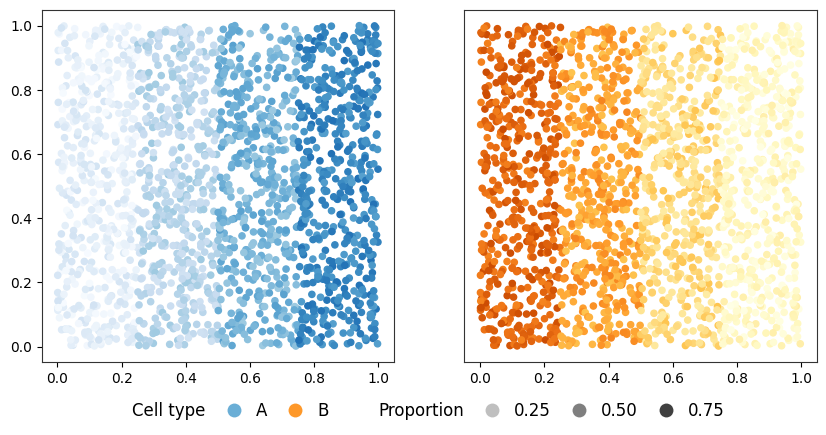

In [ ]:
# Simulated cell type proportions

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(adata_st.obsm['spatial'][:, 0], adata_st.obsm['spatial'][:, 1], c=adata_st.obsm['proportion_true']['celltype_0'], s=20, cmap=new_cmap_1)
axes[0].set_aspect('equal', adjustable='box')

axes[1].scatter(adata_st.obsm['spatial'][:, 0], adata_st.obsm['spatial'][:, 1], c=adata_st.obsm['proportion_true']['celltype_1'], s=20, cmap=new_cmap_2)
axes[1].set_yticks([])
axes[1].set_aspect('equal', adjustable='box')

title_celltype = plt.Line2D([], [], linestyle='none', marker='', label='Cell type')
h_color1 = plt.Line2D([0], [0], marker='o', color='w', label='A',
                  markerfacecolor=new_cmap_1(128), markeredgecolor='none', markersize=10)
h_color2 = plt.Line2D([0], [0], marker='o', color='w', label='B',
                  markerfacecolor=new_cmap_2(128), markeredgecolor='none', markersize=10)

title_prop = plt.Line2D([], [], linestyle='none', marker='', label='Proportion')
h_p1 = plt.Line2D([0], [0], marker='o', color='black', label='0.25',linestyle='none',
              markerfacecolor='black', markeredgecolor='none', alpha=0.25, markersize=10)
h_p2 = plt.Line2D([0], [0], marker='o', color='black', label='0.50', linestyle='none',
              markerfacecolor='black', markeredgecolor='none', alpha=0.50, markersize=10)
h_p3 = plt.Line2D([0], [0], marker='o', color='black', label='0.75', linestyle='none',
              markerfacecolor='black', markeredgecolor='none', alpha=0.75, markersize=10)

handles = [title_celltype, h_color1, h_color2, title_prop, h_p1, h_p2, h_p3]

leg = fig.legend(
    handles=handles,
    loc='lower center',      # 或 'upper center'
    ncol=len(handles),       # 所有项横排
    frameon=False,
    handlelength=1.0,
    columnspacing=1.2,
    borderaxespad=0.5,
)
#plt.tight_layout()
#plt.savefig(os.path.join(FIG_PATH, 'simulation_proportion.pdf'), dpi=300)
plt.show()

In [21]:
adata_st.uns['logmu'][:, 0, 0:200].mean(axis=1)

array([-8.37082775, -9.18071432, -7.80649894, ..., -8.7971501 ,
       -8.1310969 , -9.1108954 ])

In [25]:
n_loading_genes = 200
loading_set = [f'gene_{i}' for i in range(n_loading_genes)]
SGP = adata_st.uns['logmu'][:, 0, 0:200].mean(axis=1)
meta_gene = adata_st[:, loading_set].X.mean(axis=1).A1

In [24]:
new_cmap_3 = set_zero_in_cmap_to_transparent(cmap=sns.color_palette("bwr", as_cmap=True))
colors=new_cmap_3(np.arange(new_cmap_3.N))
colors = colors[new_cmap_3.N*1//4:new_cmap_3.N*3//4]
new_cmap_3 = ListedColormap(colors)

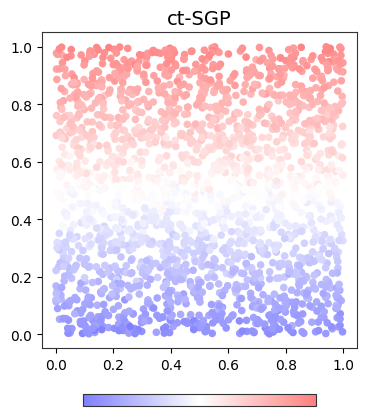

In [ ]:
# The intra-cell-type variation pattern of ct-SGP

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sca = axes.scatter(adata_st.obsm['spatial'][:, 0], adata_st.obsm['spatial'][:, 1], c=SGP, s=20, cmap=new_cmap_3)
axes.set_title('ct-SGP')
axes.set_aspect('equal', adjustable='box')
cbar = fig.colorbar(
    sca, ax=axes,
    orientation='horizontal',
    fraction=0.06,        # 色条相对于轴的长度比例，可微调
    pad=0.12,
    shrink=0.6            # 轴与色条间距，可微调
)
cbar.set_ticks([])
#plt.savefig(os.path.join(FIG_PATH, 'intra-variation.pdf'))
plt.show()

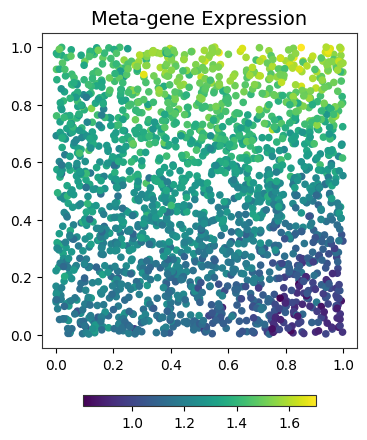

In [ ]:
# Aggregated expression of the selected SGP genes as a meta gene

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sm = axes.scatter(adata_st.obsm['spatial'][:, 0], adata_st.obsm['spatial'][:, 1], c=meta_gene, s=20, cmap='viridis')
axes.set_title('Meta-gene Expression')
axes.set_aspect('equal', adjustable='box')
cbar = fig.colorbar(
    sm, ax=axes,
    orientation='horizontal',
    fraction=0.06,        # 色条相对于轴的长度比例，可微调
    pad=0.12,
    shrink=0.6            # 轴与色条间距，可微调
)
#cbar.ax.set_title('Expression', pad=5)  # 标题
#cbar.set_ticks([])  
#plt.savefig(os.path.join(FIG_PATH, 'meta_gene_expression.pdf'), dpi=300)
plt.show()

## Cell type deconvolution using MacSGP 

In [36]:
MacSGP.utils.Cal_Spatial_Net(adata_st, mode='KNN', k_cutoff=6)

Calculating spatial neighbor graph ...
The graph contains 13990 edges, 2000 spots.
6.995 neighbors per spot on average.


In [37]:
adata_st, adata_basis = MacSGP.utils.preprocess(adata_st,adata_ref,
                                                celltype_ref_col = "celltype",
                                                n_hvg_group = 1000)

Finding highly variable genes...
2000 highly variable genes selected.
Calculate basis for deconvolution...
Preprocess ST data...


In [42]:
model = MacSGP.model.Model_deconv(adata_st, adata_basis, n_layers =4, training_steps=10000)
model.train(step_interval=1000)
adata_st = model.eval()

  0%|          | 16/10000 [00:00<03:37, 45.96it/s]

Step: 0, Loss: -738.1507, d_loss: -745.4700, f_loss: 73.1936


 10%|█         | 1017/10000 [00:08<01:11, 126.35it/s]

Step: 1000, Loss: -932.8798, d_loss: -936.4860, f_loss: 36.0620


 20%|██        | 2018/10000 [00:16<01:02, 126.94it/s]

Step: 2000, Loss: -933.0602, d_loss: -936.6627, f_loss: 36.0248


 30%|███       | 3019/10000 [00:24<00:55, 126.23it/s]

Step: 3000, Loss: -933.1184, d_loss: -936.7147, f_loss: 35.9627


 40%|████      | 4020/10000 [00:31<00:47, 126.36it/s]

Step: 4000, Loss: -933.1473, d_loss: -936.7316, f_loss: 35.8433


 50%|█████     | 5021/10000 [00:39<00:39, 126.22it/s]

Step: 5000, Loss: -933.1570, d_loss: -936.7333, f_loss: 35.7624


 60%|██████    | 6022/10000 [00:47<00:31, 126.53it/s]

Step: 6000, Loss: -933.1658, d_loss: -936.7317, f_loss: 35.6589


 70%|███████   | 7023/10000 [00:55<00:23, 126.22it/s]

Step: 7000, Loss: -933.1772, d_loss: -936.7346, f_loss: 35.5737


 80%|████████  | 8024/10000 [01:03<00:15, 125.55it/s]

Step: 8000, Loss: -933.1777, d_loss: -936.7272, f_loss: 35.4955


 90%|█████████ | 9025/10000 [01:11<00:07, 125.22it/s]

Step: 9000, Loss: -933.1425, d_loss: -936.6830, f_loss: 35.4048


100%|██████████| 10000/10000 [01:19<00:00, 126.40it/s]


Dropping cell types: []


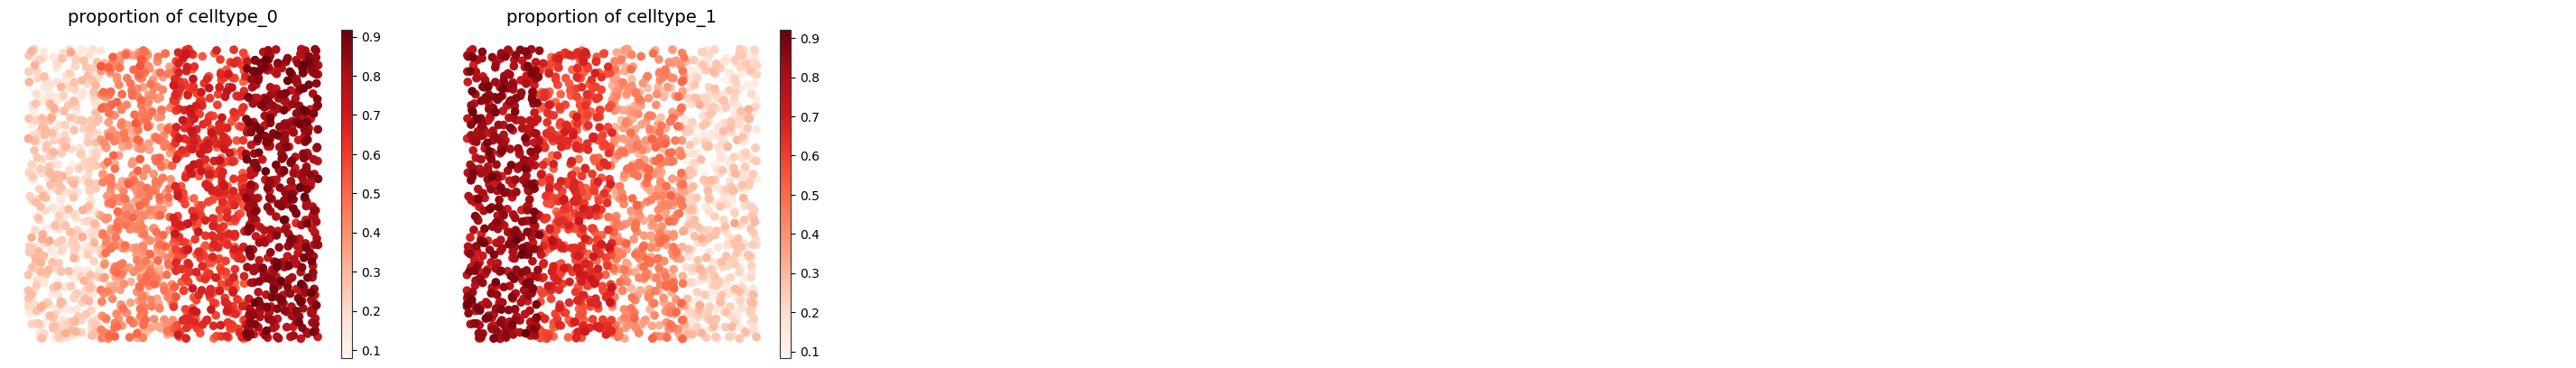

In [63]:
from MacSGP.vis import plot_spatial_ct
adata_st.obsm['spatial'][:, 1] = -adata_st.obsm['spatial'][:, 1]
plot_spatial_ct(adata_st, index='proportion',
                proportion_threshold=0.0, num_threshold=100, 
                cmap='Reds', 
                spot_size=0.03, 
                ncols=6)

## Applying MacSGP to detect cell-type-specific SGPs

In [50]:
model = MacSGP.model.Model(adata_st, adata_basis, n_layers=4, training_steps=3000)

model.train(step_interval=200)
adata_result = model.eval()

  1%|          | 22/3000 [00:00<00:27, 107.30it/s]

Step: 0, Loss: -929.4153, d_loss: -936.7347, f_loss: 73.1936, reg_loss: 0.0000


  7%|▋         | 220/3000 [00:02<00:26, 106.43it/s]

Step: 200, Loss: -936.9761, d_loss: -941.9072, f_loss: 37.2295, reg_loss: 0.1088


 14%|█▍        | 418/3000 [00:03<00:24, 106.60it/s]

Step: 400, Loss: -945.9510, d_loss: -952.7484, f_loss: 36.1585, reg_loss: 0.2866


 21%|██        | 617/3000 [00:06<00:28, 84.09it/s] 

Step: 600, Loss: -949.9074, d_loss: -956.8842, f_loss: 36.0878, reg_loss: 0.3034


 27%|██▋       | 815/3000 [00:08<00:26, 83.84it/s]

Step: 800, Loss: -952.0110, d_loss: -958.9850, f_loss: 36.0688, reg_loss: 0.3033


 34%|███▍      | 1013/3000 [00:10<00:23, 83.66it/s]

Step: 1000, Loss: -953.4178, d_loss: -960.3356, f_loss: 36.0553, reg_loss: 0.2984


 40%|████      | 1211/3000 [00:13<00:21, 83.51it/s]

Step: 1200, Loss: -954.1185, d_loss: -960.9217, f_loss: 36.0395, reg_loss: 0.2882


 47%|████▋     | 1409/3000 [00:15<00:18, 83.79it/s]

Step: 1400, Loss: -954.5767, d_loss: -961.3418, f_loss: 36.0220, reg_loss: 0.2849


 54%|█████▍    | 1616/3000 [00:17<00:16, 83.68it/s]

Step: 1600, Loss: -954.8704, d_loss: -961.6078, f_loss: 35.9991, reg_loss: 0.2827


 60%|██████    | 1814/3000 [00:20<00:14, 83.81it/s]

Step: 1800, Loss: -954.9910, d_loss: -961.6797, f_loss: 35.9623, reg_loss: 0.2786


 67%|██████▋   | 2012/3000 [00:22<00:11, 83.62it/s]

Step: 2000, Loss: -955.0375, d_loss: -961.7027, f_loss: 35.9261, reg_loss: 0.2768


 74%|███████▎  | 2210/3000 [00:25<00:09, 83.75it/s]

Step: 2200, Loss: -954.9111, d_loss: -961.5479, f_loss: 35.8978, reg_loss: 0.2745


 81%|████████  | 2417/3000 [00:27<00:06, 83.87it/s]

Step: 2400, Loss: -955.0779, d_loss: -961.6929, f_loss: 35.8567, reg_loss: 0.2729


 87%|████████▋ | 2615/3000 [00:29<00:04, 83.79it/s]

Step: 2600, Loss: -955.1476, d_loss: -961.7650, f_loss: 35.8262, reg_loss: 0.2734


 94%|█████████▍| 2813/3000 [00:32<00:02, 83.97it/s]

Step: 2800, Loss: -955.0878, d_loss: -961.6365, f_loss: 35.8047, reg_loss: 0.2674


100%|██████████| 3000/3000 [00:34<00:00, 87.09it/s]


Dropping cell types: []


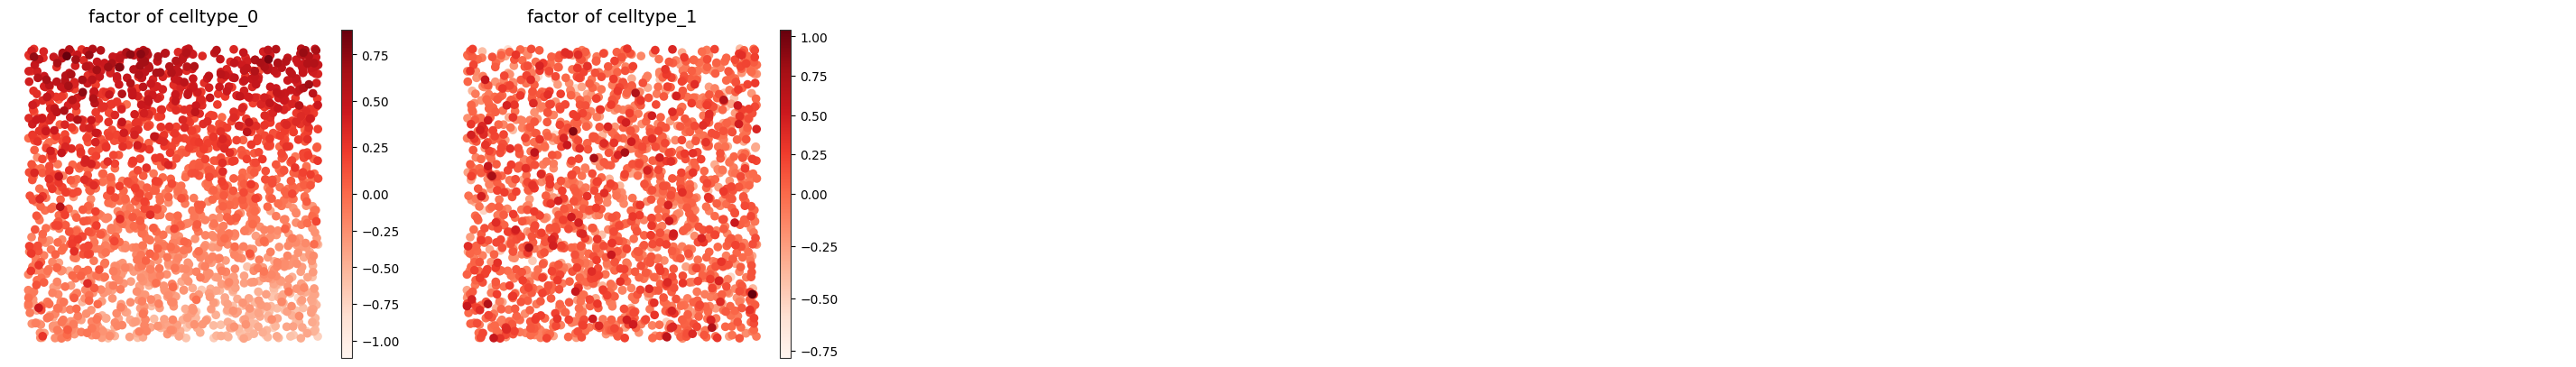

In [ ]:
adata_result.obsm['spatial'][:, 1] = -adata_result.obsm['spatial'][:, 1]
plot_spatial_ct(adata_result, index='factor', reverse=False,
                proportion_threshold=0.0, num_threshold=100, 
                cmap='Reds', 
                spot_size=0.03, 
                ncols=6)